<a href="https://colab.research.google.com/github/ghadiamine/Python-Machine-Learning/blob/master/Predection_Price_Nasdaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf

In [ ]:
#Interval required 15 minutes
df = yf.download(tickers='NDAQ', period='60D', interval='15m')
#Print data
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-07-06 09:30:00-04:00,178.279999,178.410294,177.360001,177.490005,177.490005,46574
2021-07-06 09:45:00-04:00,177.600006,177.710007,177.000000,177.000000,177.000000,26177
2021-07-06 10:00:00-04:00,176.949997,177.139999,176.570007,176.770004,176.770004,11499
2021-07-06 10:15:00-04:00,176.845001,176.845001,175.820007,176.225006,176.225006,31280
2021-07-06 10:30:00-04:00,176.119995,176.199997,175.740005,176.199997,176.199997,11612
...,...,...,...,...,...,...
2021-09-28 10:15:00-04:00,190.684998,190.710007,189.380005,190.024994,190.024994,33161
2021-09-28 10:30:00-04:00,190.250000,192.029999,189.960007,191.979996,191.979996,63689
2021-09-28 10:45:00-04:00,192.000000,192.149994,191.479996,192.020004,192.020004,106440


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-06-25 09:30:00-04:00,178.589996,178.928604,178.000000,178.350006,178.350006,34084
2021-06-25 09:45:00-04:00,178.419998,178.699997,178.130005,178.339996,178.339996,34241
2021-06-25 10:00:00-04:00,178.335007,178.335007,177.929993,178.057495,178.057495,12790
2021-06-25 10:15:00-04:00,177.990005,178.156006,177.919998,178.156006,178.156006,22314
2021-06-25 10:30:00-04:00,178.115005,178.309998,177.970001,178.149994,178.149994,20414
...,...,...,...,...,...,...
2021-09-20 15:00:00-04:00,189.384995,189.509995,188.990005,189.139999,189.139999,22110
2021-09-20 15:15:00-04:00,189.250000,190.100006,189.110001,190.050003,190.050003,39228
2021-09-20 15:30:00-04:00,190.059998,190.839996,189.850098,190.800003,190.800003,48571


In [ ]:
df.shape


(1561, 6)

In [ ]:
df.rename(str.lower, axis='columns',inplace=True)

In [ ]:
df.drop(['adj close'],axis=1,inplace=True)

In [ ]:
df.isnull().any()#We don't have any NaN values luckily

open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [ ]:
df.shape #We can see that we have 1560 observations for nazdaq here

(4679, 5)

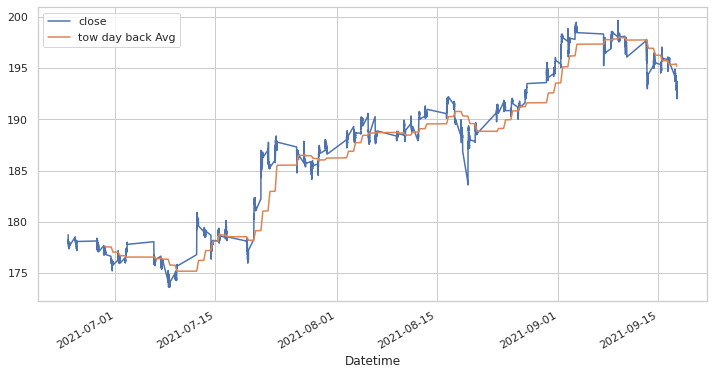

In [ ]:
sns.set()
sns.set_style('whitegrid')
df['close'].plot(figsize=(12,6),label='close')
df['close'].rolling(window=288).mean().plot(label='tow day back Avg')# Plotting the 
#rolling 30 back average against the Close Price
plt.legend()

In [ ]:
df['ohlc_average'] = (df['open'] + df['high'] + df['low'] + df['close']) / 4

In [ ]:
df['Price_After_back']=df['close'].shift(-96) #This will be our label

In [ ]:
df.tail()#We basically moved all our values 2 days  lines up in our last cell

,open,high,low,close,volume,ohlc_average,Price_After_back
Datetime,,,,,,,
2021-09-17 15:35:00-04:00,193.529999,193.789993,193.454300,193.649994,11205,193.606071,NaN
2021-09-17 15:40:00-04:00,193.699997,193.779999,193.595001,193.740005,25024,193.703751,NaN
2021-09-17 15:45:00-04:00,193.779999,193.779999,193.020096,193.024994,10641,193.401272,NaN
2021-09-17 15:50:00-04:00,193.000000,193.000000,191.000000,192.020004,93098,192.255001,NaN
2021-09-17 15:55:00-04:00,192.240005,193.300003,192.240005,192.929993,64095,192.677502,NaN


In [ ]:
#Preprocessing
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_back',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=df['Price_After_back']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 95.5626 %


In [ ]:
preds = reg.predict(X_test)
print("The prediction is:",preds[3],"But the real value is:" ,y_test[3])
#We can see that our predictions are kind of accurate but we still need to work on on them a lot. 

The prediction is: 196.06517593383788 But the real value is: 195.00999450683594


In [ ]:
#Apply our model and get our prediction
X_30=X[-96:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [ ]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=df.iloc[-1].name
modified_date = last_date + timedelta(minutes=0)
date=pd.date_range(modified_date,periods=96,freq='15m')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df=df.append(df1)
df1.head()

,Forecast
2021-09-30 14:25:00-04:00,197.083548
2022-12-31 14:25:00-05:00,196.214228
2024-03-31 14:25:00-04:00,195.736954
2025-06-30 14:25:00-04:00,195.981921
2026-09-30 14:25:00-04:00,196.530773


In [ ]:
date

DatetimeIndex(['2021-09-30 14:25:00-04:00', '2022-12-31 14:25:00-05:00'], dtype='datetime64[ns, America/New_York]', freq='15M')

AttributeError: ignored

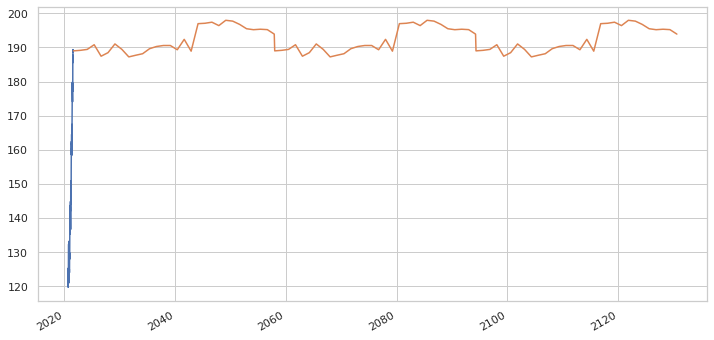

In [ ]:
#Now we'll plot our forecast! 
df['close'].plot(figsize=(12,6),label='Close')
df['Forecast'].plot(label='forecast')
df.legend()